In [49]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
# nltk.download('punkt')       # only need to run this once DONE
#nltk.download('stopwords')   # only need to run this once DONE 
# nltk.download('wordnet')     # only need to run this once DONE
# nltk.download('omw-1.4')     # only need to run this once DONE
lang="english"
 

In [50]:
# load review data for las vegas hotels 
reviews = pd.read_csv('../data/vegas_hotel_reviews.csv',encoding='latin1')
business = pd.read_csv('../data/vegas_hotel_info.csv')

In [51]:
reviews.shape

(23046, 10)

In [52]:
# focus on reviews for the Aria hotel 
ariaID = "JpHE7yhMS5ehA9e8WG_ETg"
ariaReviews = reviews[reviews.business_id==ariaID]

In [53]:
##
## Word Frequency Analysis  
##

# First lower case all words and merge all reviews together to form one string 
ariaReviewsList = [re.sub("[^\w ]",  " " , x.lower()) for x in ariaReviews['text']]    # creates a list
ariaReviewsStr = ' '.join(ariaReviewsList)                                             # concatenates all the reviews and creates one very long string!
print(ariaReviewsStr[:100])

they likely have some issues to work out  but they are a new establishment  the trend here  as evide


In [54]:
# Perform tokenization
tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
ariaReviewsTokenized = tokeniser.tokenize(ariaReviewsStr)
print(ariaReviewsTokenized[:100])

['they', 'likely', 'have', 'some', 'issues', 'to', 'work', 'out', 'but', 'they', 'are', 'new', 'establishment', 'the', 'trend', 'here', 'as', 'evidenced', 'by', 'the', 'wynn', 'is', 'non', 'theming', 'one', 'concern', 'that', 'some', 'might', 'have', 'is', 'that', 'the', 'aria', 'and', 'city', 'center', 'look', 'nothing', 'like', 'vegas', 'stayed', 'one', 'night', 'at', 'aria', 'on', 'opening', 'night', 'and', 'checked', 'out', 'most', 'of', 'the', 'bars', 'and', 'common', 'areas', 'in', 'the', 'place', 'the', 'room', 'was', 'quite', 'nice', 'and', 'very', 'high', 'tech', 'like', 'the', 'rest', 'of', 'the', 'hotel', 'decor', 'is', 'muted', 'and', 'brownish', 'walking', 'in', 'the', 'curtains', 'open', 'to', 'do', 'reveal', 'of', 'the', 'view', 'over', 'the', 'strip', 'bellagio', 'is', 'few', 'buildings']


In [55]:
tmp = ngrams(ariaReviewsTokenized[:10],2)
tmp2 = [ ' '.join(grams) for grams in tmp]
print(tmp2)

['they likely', 'likely have', 'have some', 'some issues', 'issues to', 'to work', 'work out', 'out but', 'but they']


In [56]:
# Get word frequencies
fdist = FreqDist(ariaReviewsTokenized)

In [57]:
# get top 10 words
fdist.most_common(35)

[('the', 25948),
 ('and', 12337),
 ('to', 11406),
 ('was', 6888),
 ('in', 6374),
 ('of', 6042),
 ('it', 5885),
 ('is', 5155),
 ('for', 4269),
 ('we', 4123),
 ('that', 4107),
 ('you', 4016),
 ('room', 4000),
 ('at', 3392),
 ('but', 3206),
 ('on', 3156),
 ('hotel', 2750),
 ('they', 2736),
 ('my', 2675),
 ('with', 2635),
 ('not', 2511),
 ('aria', 2379),
 ('this', 2337),
 ('have', 2225),
 ('were', 2191),
 ('are', 2133),
 ('so', 2099),
 ('had', 2073),
 ('there', 2058),
 ('all', 1795),
 ('very', 1694),
 ('be', 1607),
 ('as', 1604),
 ('our', 1603),
 ('out', 1595)]

In [58]:
# Remove stopwords 
stop_words=set(stopwords.words("english"))
ariaReviewsTokenizedStop = [word for word in ariaReviewsTokenized if not word in stop_words]
# get new word frequencies
fdistStop = FreqDist(ariaReviewsTokenizedStop)

In [59]:
fdistStop.most_common(10)

[('room', 4000),
 ('hotel', 2750),
 ('aria', 2379),
 ('like', 1520),
 ('nice', 1443),
 ('vegas', 1337),
 ('get', 1318),
 ('one', 1282),
 ('stay', 1264),
 ('great', 1207)]

In [60]:
# put everything into functions 
def process_raw_text(text):    
    # Tokenize words
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase tokens
    tokens_lower = [token.lower() for token in tokens]
    
    # Remove stopwords
    clean = [token for token in tokens_lower if token not in stop_words]
    return clean

def frequent_tokens(corpus, n=30):    
    # Preprocess each document
    documents = [process_raw_text(document) for document in corpus]
   
    # get all tokens and put into one long list 
    allTokens = [document for document in documents]       
    allTokens_flat = [item for sublist in allTokens for item in sublist]
    
    # Find frequency of ngrams
    freq_dist = FreqDist(allTokens_flat)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["token", "count"])


In [61]:
data=frequent_tokens(ariaReviews['text'],30)
print(data)

         token  count
0         room   4000
1        hotel   2750
2         aria   2379
3         like   1520
4         nice   1443
5        vegas   1337
6          get   1318
7          one   1282
8         stay   1264
9        great   1207
10     service   1201
11      casino   1198
12       rooms   1175
13       would   1147
14        time   1111
15       check   1075
16      really   1008
17        good    928
18       place    904
19          us    903
20        also    854
21        back    794
22        even    780
23       strip    758
24      stayed    731
25  everything    731
26         bed    727
27       night    701
28          go    698
29         got    677


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most common tokens')

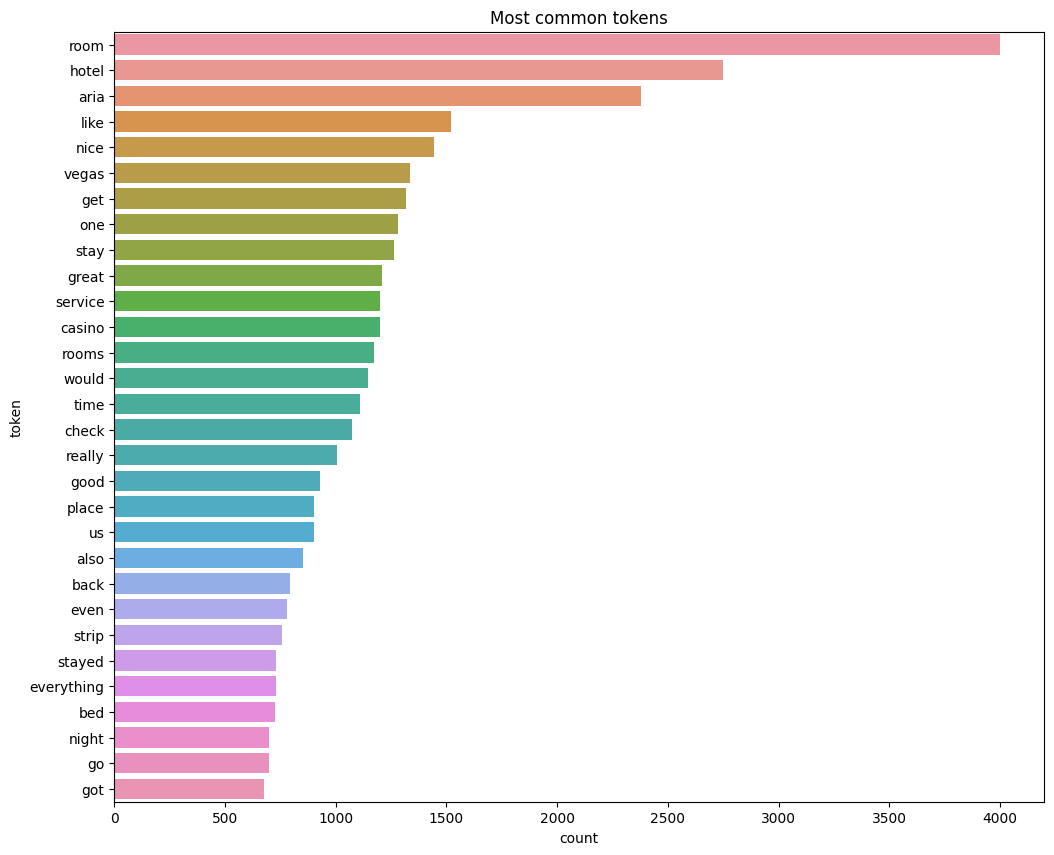

In [62]:
# plot result
plt.figure(figsize=(12,10))
sns.barplot(y="token", x="count", data=data)
plt.title("Most common tokens")

In [63]:
## write more general function that (1) performs lemmatization and
## (2) computes frequence of general n-grams

# put everything into functions 
def process_raw_text(text):    
    # Tokenize words
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase, lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]
    lemmas = [token.lower() for token in lemmas]    
    
    clean = [lemma for lemma in lemmas if lemma not in stop_words]
    return clean

def frequent_ngram(corpus, ngram, n=30):    
    # Preprocess each document
    documents = [process_raw_text(document) for document in corpus]
    
    # Find ngrams per document and put into one long list
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    n_grams_flat = [item for sublist in n_grams for item in sublist]
    
    # get frequencies of ngrams
    freq_dist = FreqDist(n_grams_flat)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])


In [64]:
data_unigrams=frequent_ngram(ariaReviews['text'],1,30)
data_bigrams=frequent_ngram(ariaReviews['text'],2,30)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most common unigrams')

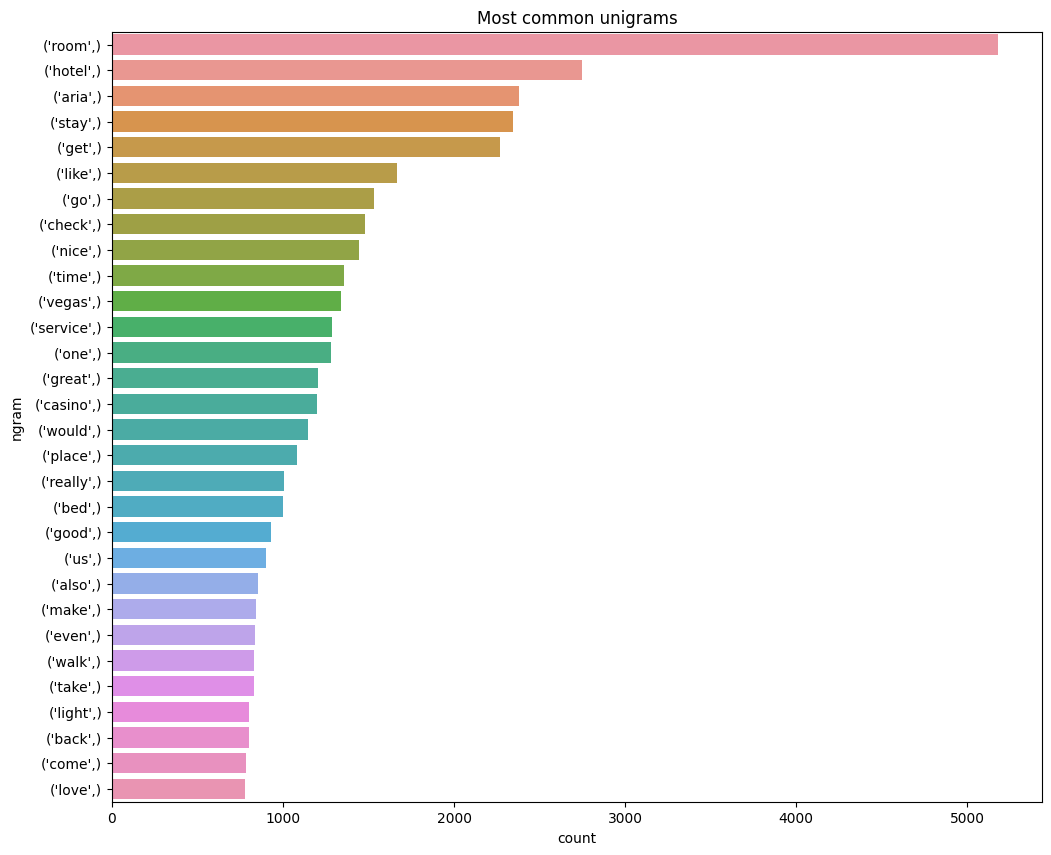

In [65]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="ngram", data=data_unigrams)
plt.title("Most common unigrams")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most common bigrams')

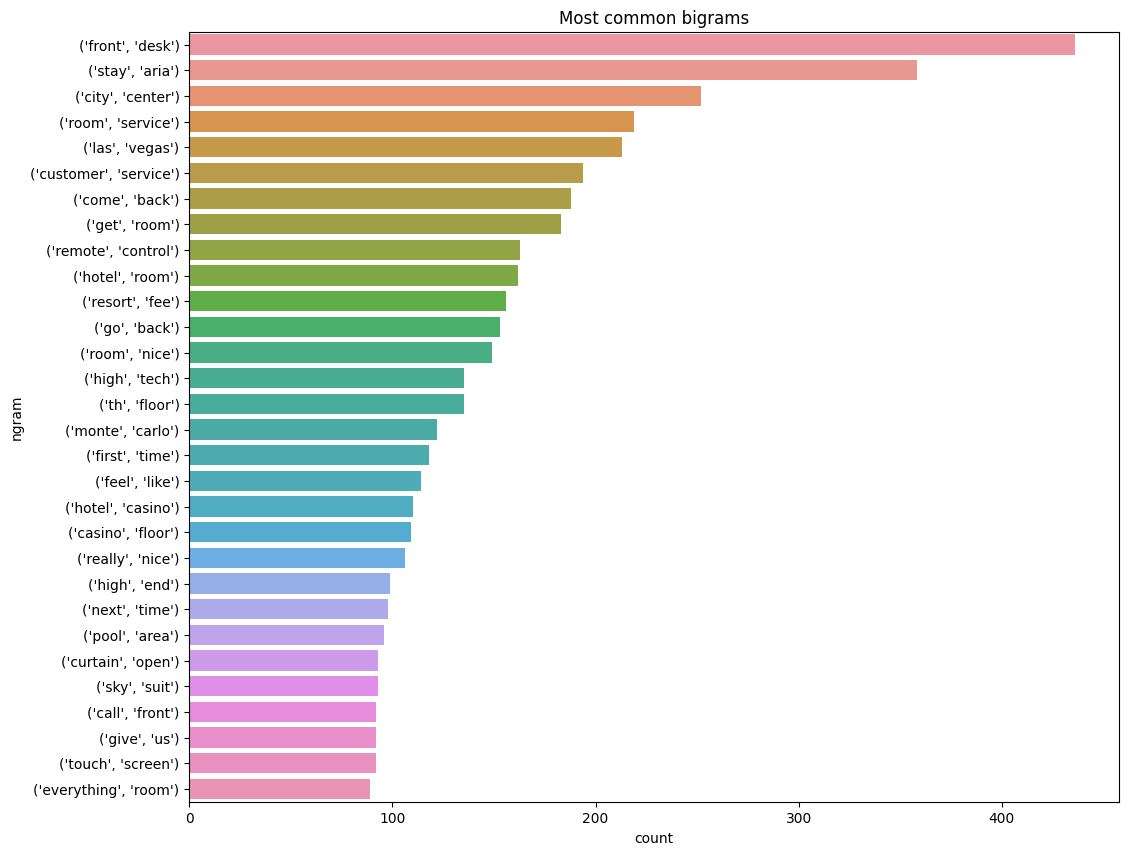

In [67]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="ngram", data=data_bigrams)
plt.title("Most common bigrams")